In [241]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline

In [242]:
start=datetime.datetime(2006,1,1)

In [243]:
end=datetime.datetime(2016,1,1)

In [244]:
BAC = yf.Ticker('BAC').history(period = '1y')
BAC['Company'] = 'BAC'

In [245]:
C = yf.Ticker('C').history(period = '1y')
C['Company'] = 'C'

In [246]:
GS = yf.Ticker('GOOG').history(period = '1y')
GS['Company'] = 'GS'

In [247]:
JPM = yf.Ticker('JPM').history(period = '1y')
JPM['Company'] = 'JPM'

In [248]:
MS = yf.Ticker('MSFT').history(period = '1y')
MS['Company'] = 'MS'

In [249]:
WFC = yf.Ticker('WFC').history(period = '1y')
WFC['Company'] = 'WFC'


In [250]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [251]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=0)

In [254]:
bank_stocks.sample(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
Date,,,,,,,,
2023-12-07 00:00:00-05:00,366.228469,369.430968,364.328847,368.933685,23118900,0.0,0.0,MS
2024-09-13 00:00:00-04:00,205.600085,206.584060,201.783476,203.075562,10226700,0.0,0.0,JPM
2024-05-20 00:00:00-04:00,176.875635,179.509167,176.790852,178.022827,17495100,0.0,0.0,GS
2024-05-23 00:00:00-04:00,195.521779,196.006116,193.801916,194.642075,8069400,0.0,0.0,JPM
2023-11-01 00:00:00-04:00,38.809353,38.828778,38.148933,38.469433,19850300,0.0,0.0,WFC


In [255]:

# Creating a MultiIndex using the stock tickers and the existing index (Date)
bank_stocks['Company'] = bank_stocks['Company'].astype(str)  # Ensure the company column is in string format
bank_stocks.set_index(['Company', bank_stocks.index], inplace=True)  # Setting the MultiIndex

# To rename the index for clarity, if needed
bank_stocks.index.names = ['Company', 'Date']

# Displaying the MultiIndex DataFrame
print(bank_stocks)


                                        Open       High        Low      Close  \
Company Date                                                                    
BAC     2023-10-24 00:00:00-04:00  25.041008  25.167479  24.710241  24.778339   
        2023-10-25 00:00:00-04:00  24.690783  24.953452  24.496216  24.856167   
        2023-10-26 00:00:00-04:00  24.797796  25.644171  24.749154  25.410688   
        2023-10-27 00:00:00-04:00  25.362046  25.362046  24.282188  24.486486   
        2023-10-30 00:00:00-04:00  24.632414  25.079923  24.593501  24.992367   
...                                      ...        ...        ...        ...   
WFC     2024-10-17 00:00:00-04:00  64.489998  64.720001  63.500000  64.379997   
        2024-10-18 00:00:00-04:00  64.410004  64.779999  63.830002  64.360001   
        2024-10-21 00:00:00-04:00  64.480003  64.690002  63.919998  64.019997   
        2024-10-22 00:00:00-04:00  64.019997  65.209999  64.000000  64.809998   
        2024-10-23 00:00:00-

In [256]:
bank_stocks.head()

Open       High        Low      Close  \
Company Date                                                                    
BAC     2023-10-24 00:00:00-04:00  25.041008  25.167479  24.710241  24.778339   
        2023-10-25 00:00:00-04:00  24.690783  24.953452  24.496216  24.856167   
        2023-10-26 00:00:00-04:00  24.797796  25.644171  24.749154  25.410688   
        2023-10-27 00:00:00-04:00  25.362046  25.362046  24.282188  24.486486   
        2023-10-30 00:00:00-04:00  24.632414  25.079923  24.593501  24.992367   

                                     Volume  Dividends  Stock Splits  
Company Date                                                          
BAC     2023-10-24 00:00:00-04:00  55975700        0.0           0.0  
        2023-10-25 00:00:00-04:00  45522400        0.0           0.0  
        2023-10-26 00:00:00-04:00  60921000        0.0           0.0  
        2023-10-27 00:00:00-04:00  64709300        0.0           0.0  
        2023-10-30 00:00:00-04:00  41891900        0.0           0.0

In [159]:
bank_stocks.to_excel('bankdata.xlsx',sheet_name='stocks')

In [257]:
bank_stocks.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [162]:
bank_stocks.groupby('Company').max()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Company,,,,,,,
BAC,43.367265,44.152145,43.367265,43.844154,107190000,0.26,0.0
C,66.906229,67.163751,65.985097,66.965660,51664900,0.56,0.0
GS,191.497912,193.055862,190.369396,192.406723,59728000,0.20,0.0
JPM,225.220001,225.919998,223.309998,225.369995,31506200,1.25,0.0
MS,466.159796,467.507368,463.624357,466.718781,78478200,0.75,0.0
WFC,64.769997,65.209999,64.000000,64.809998,62733200,0.40,0.0


In [163]:
returns = pd.DataFrame()

In [164]:
bank_stocks.head()

Open       High        Low      Close    Volume  \
Company Date                                                               
BAC     2023-10-24  25.041008  25.167479  24.710241  24.778339  55975700   
        2023-10-25  24.690783  24.953452  24.496216  24.856167  45522400   
        2023-10-26  24.797797  25.644173  24.749156  25.410690  60921000   
        2023-10-27  25.362046  25.362046  24.282188  24.486486  64709300   
        2023-10-30  24.632412  25.079921  24.593499  24.992365  41891900   

                    Dividends  Stock Splits  
Company Date                                 
BAC     2023-10-24        0.0           0.0  
        2023-10-25        0.0           0.0  
        2023-10-26        0.0           0.0  
        2023-10-27        0.0           0.0  
        2023-10-30        0.0           0.0

In [166]:
for tick in tickers:
    returns[tick+'_Return'] = bank_stocks.loc[tick]['Close'].pct_change()
    
returns.head(5)

,BAC_Return,C_Return,GS_Return,JPM_Return,MS_Return,WFC_Return
Date,,,,,,
2023-10-24,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-25,0.003141,-0.008220,-0.095989,-0.005454,0.030678,-0.006365
2023-10-26,0.022309,0.018907,-0.025499,0.002564,-0.037514,0.015885
2023-10-27,-0.036371,-0.027961,-0.000324,-0.036019,0.005856,-0.022446
2023-10-30,0.020659,0.018044,0.019044,0.012750,0.022740,0.017286


In [167]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2023-10-24 to 2024-10-23
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BAC_Return  251 non-null    float64
 1   C_Return    251 non-null    float64
 2   GS_Return   251 non-null    float64
 3   JPM_Return  251 non-null    float64
 4   MS_Return   251 non-null    float64
 5   WFC_Return  251 non-null    float64
dtypes: float64(6)
memory usage: 13.8+ KB


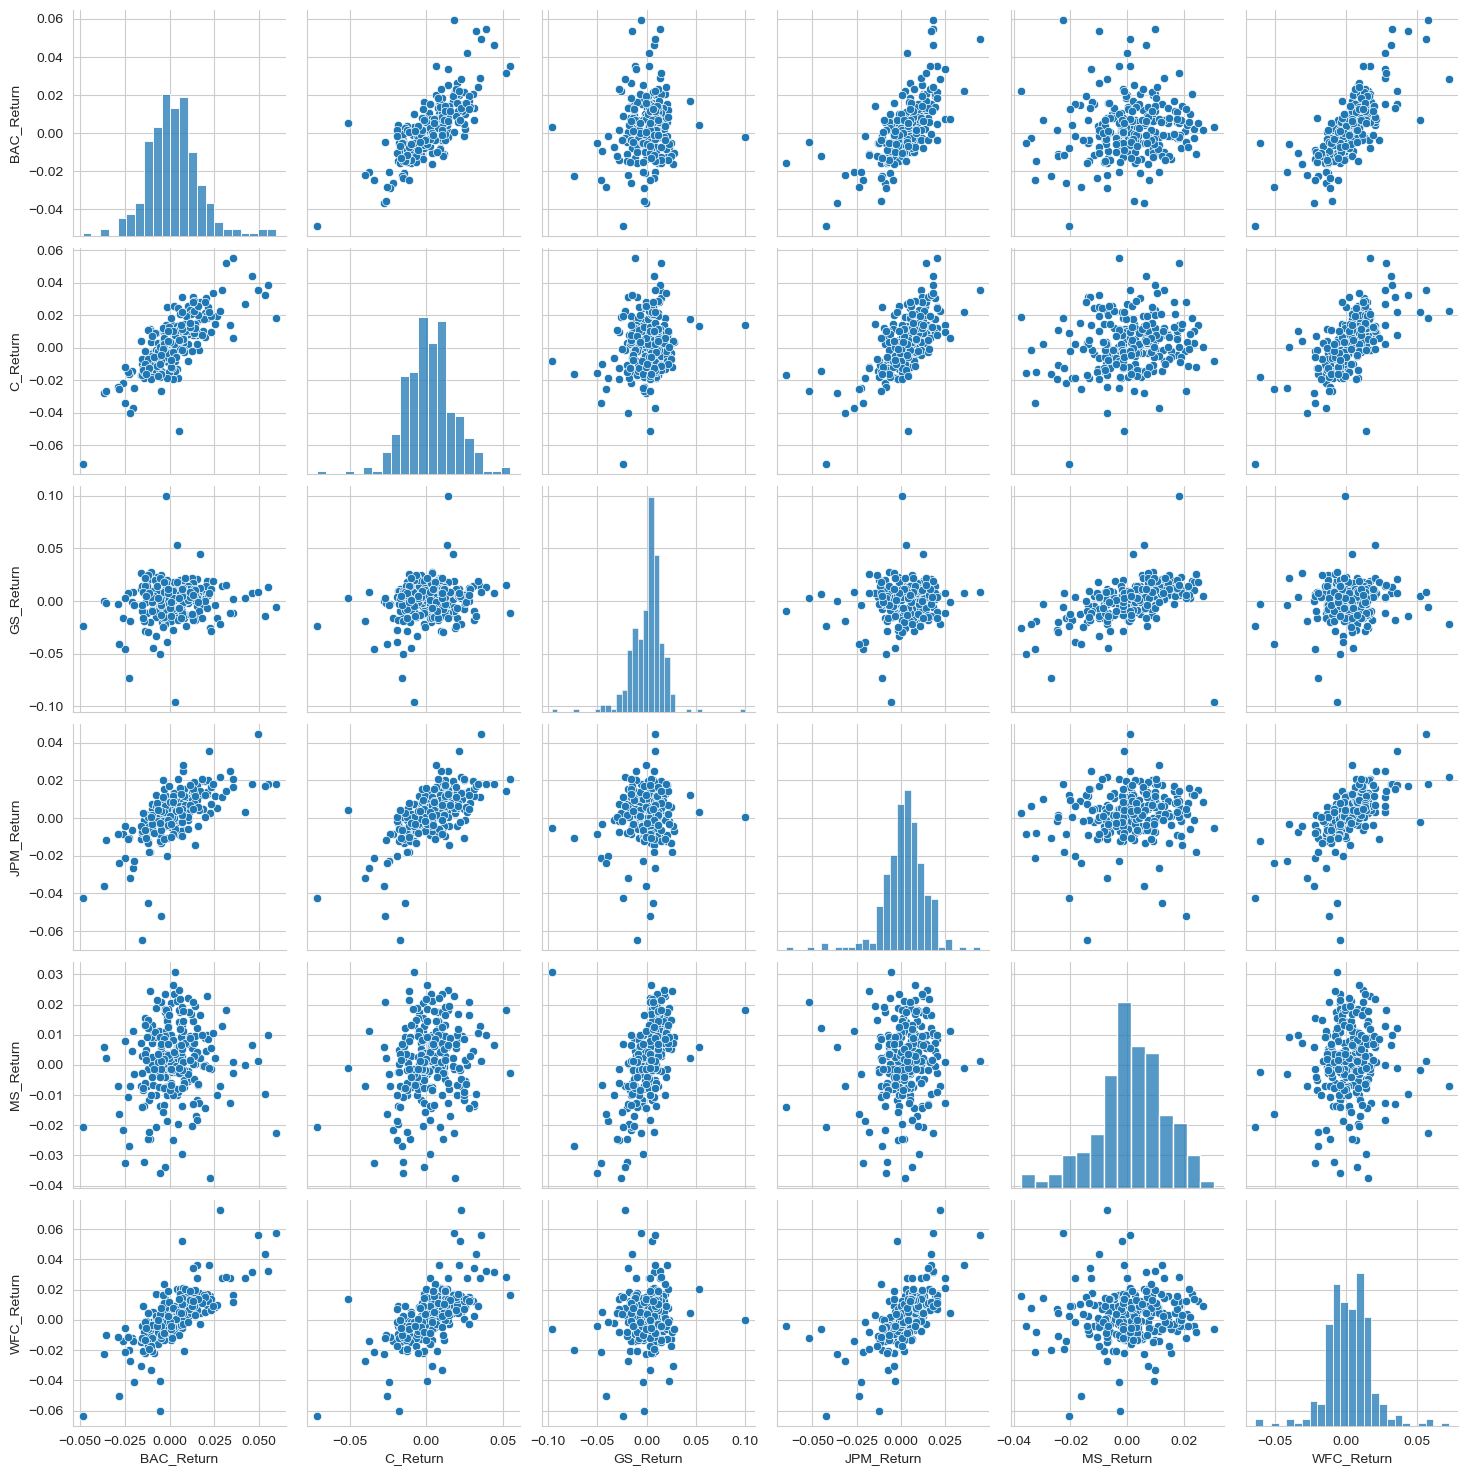

In [168]:
sns.pairplot(returns[1:])

In [169]:
returns.idxmin()


BAC_Return    2024-08-02
C_Return      2024-08-02
GS_Return     2023-10-25
JPM_Return    2024-04-12
MS_Return     2023-10-26
WFC_Return    2024-08-02
dtype: object

In [170]:
returns.idxmax()

BAC_Return    2023-12-14
C_Return      2024-01-30
GS_Return     2024-04-26
JPM_Return    2024-10-11
MS_Return     2023-10-25
WFC_Return    2024-02-15
dtype: object

In [171]:
returns.std()

BAC_Return    0.014855
C_Return      0.016246
GS_Return     0.017414
JPM_Return    0.012492
MS_Return     0.012275
WFC_Return    0.016343
dtype: float64

In [172]:
# Ensure that 'returns' index is a DateTimeIndex
returns.index = pd.to_datetime(returns.index)

# Now use .loc to filter between the date range as datetime objects
returns.loc['2023-01-01':'2023-12-31'].std()


BAC_Return    0.018417
C_Return      0.015034
GS_Return     0.020150
JPM_Return    0.009111
MS_Return     0.012949
WFC_Return    0.014944
dtype: float64

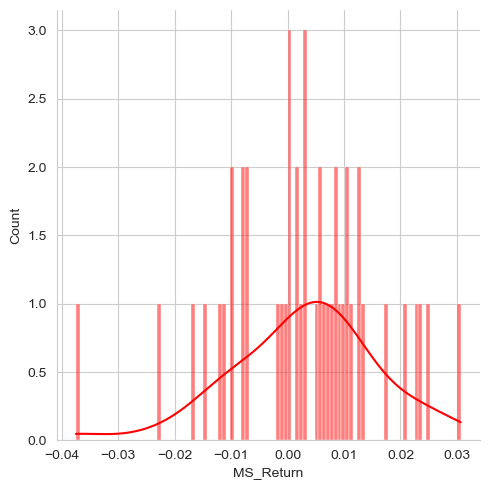

In [173]:
sns.displot(returns['2023-01-01':'2023-12-31']['MS_Return'],color='red',bins=100,kde=True)

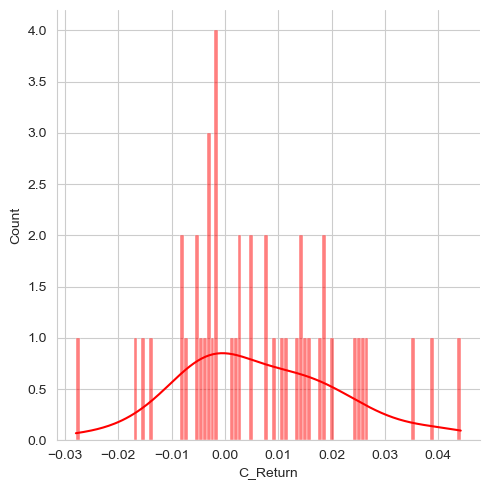

In [174]:
sns.displot(returns['2023-01-01':'2023-12-31']['C_Return'],color='red',bins=100,kde=True)

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

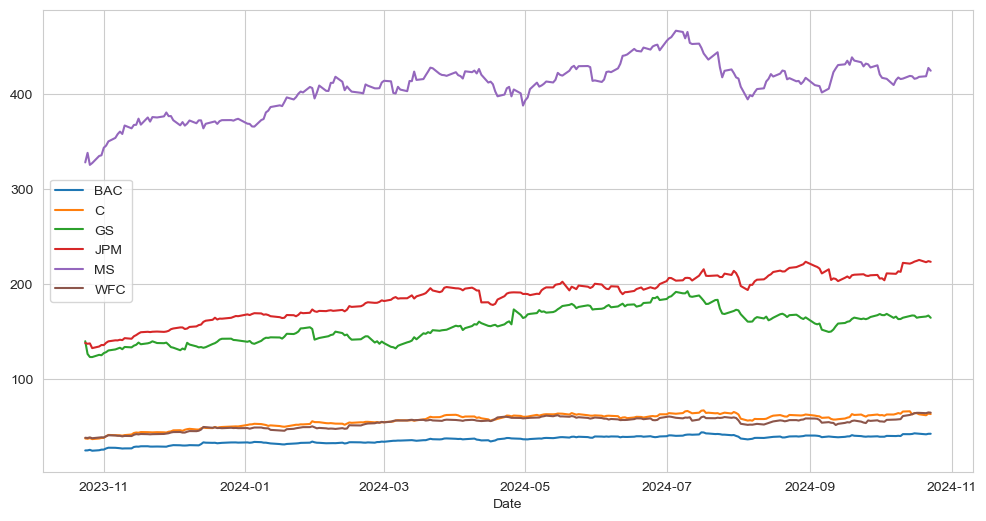

In [176]:
for tick in tickers:
    bank_stocks.loc[tick]['Close'].plot(figsize=(12,6),label=tick)
plt.legend()


In [177]:
bank_stocks.head() 

Open       High        Low      Close    Volume  \
Company Date                                                               
BAC     2023-10-24  25.041008  25.167479  24.710241  24.778339  55975700   
        2023-10-25  24.690783  24.953452  24.496216  24.856167  45522400   
        2023-10-26  24.797797  25.644173  24.749156  25.410690  60921000   
        2023-10-27  25.362046  25.362046  24.282188  24.486486  64709300   
        2023-10-30  24.632412  25.079921  24.593499  24.992365  41891900   

                    Dividends  Stock Splits  
Company Date                                 
BAC     2023-10-24        0.0           0.0  
        2023-10-25        0.0           0.0  
        2023-10-26        0.0           0.0  
        2023-10-27        0.0           0.0  
        2023-10-30        0.0           0.0

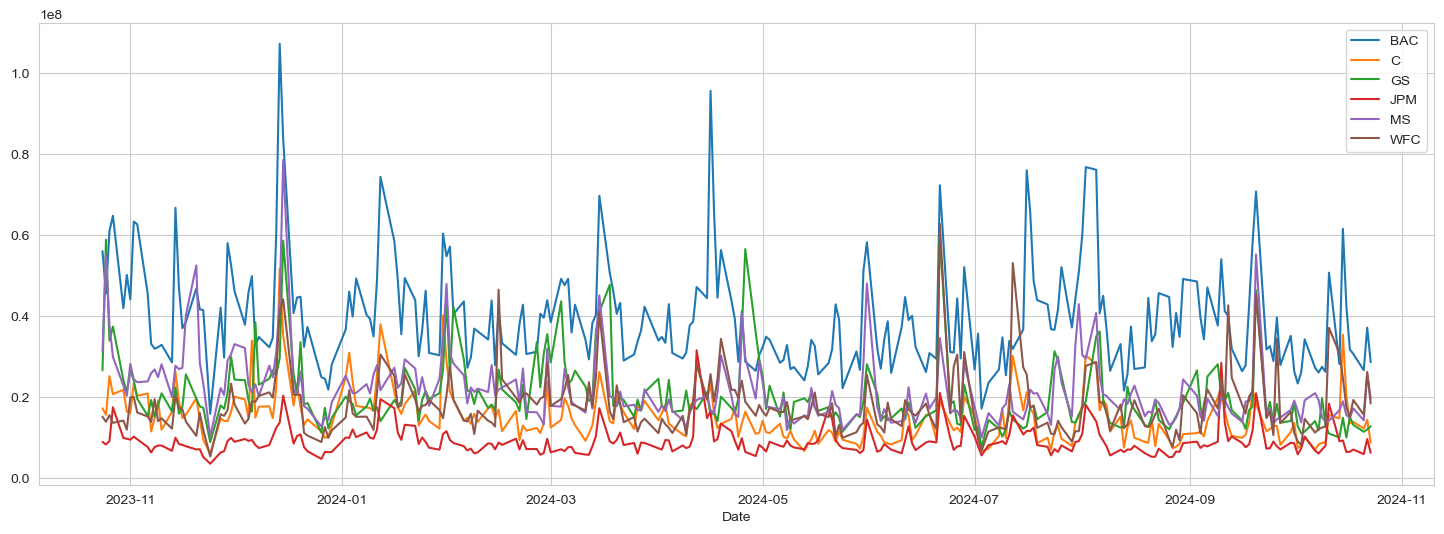

In [178]:
#bank_stocks.xs(key='Company',axis=1,level='Stock Info').plot(figsize=(24,12),label=tick)

for tick in tickers:
    bank_stocks.loc[tick]['Volume'].plot(figsize=(18,6),label=tick)
plt.legend()

In [179]:
returns.head()

,BAC_Return,C_Return,GS_Return,JPM_Return,MS_Return,WFC_Return
Date,,,,,,
2023-10-24,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-25,0.003141,-0.008220,-0.095989,-0.005454,0.030678,-0.006365
2023-10-26,0.022309,0.018907,-0.025499,0.002564,-0.037514,0.015885
2023-10-27,-0.036371,-0.027961,-0.000324,-0.036019,0.005856,-0.022446
2023-10-30,0.020659,0.018044,0.019044,0.012750,0.022740,0.017286


In [187]:
bank_stocks.reset_index()['Company'] == 'BAC'

0        True
1        True
2        True
3        True
4        True
        ...  
1507    False
1508    False
1509    False
1510    False
1511    False
Name: Company, Length: 1512, dtype: bool

In [224]:
# Filter rows where the 'Company' column is 'BAC'

BAC = bank_stocks.loc[bank_stocks['Company'] == 'BAC'].iloc[:,3:]


BAC.set_index('Date',inplace=True)

BAC.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-10-24,25.041008,25.167479,24.710241,24.778339,55975700,0.0,0.0
2023-10-25,24.690783,24.953452,24.496216,24.856167,45522400,0.0,0.0
2023-10-26,24.797797,25.644173,24.749156,25.410690,60921000,0.0,0.0
2023-10-27,25.362046,25.362046,24.282188,24.486486,64709300,0.0,0.0
2023-10-30,24.632412,25.079921,24.593499,24.992365,41891900,0.0,0.0


In [225]:
BAC.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-17,42.830002,43.000000,42.470001,42.599998,31708600,0.0,0.0
2024-10-18,42.430000,42.650002,42.110001,42.320000,30593500,0.0,0.0
2024-10-21,42.250000,42.410000,41.740002,41.759998,26589500,0.0,0.0
2024-10-22,41.650002,42.410000,41.570000,42.299999,37104400,0.0,0.0
2024-10-23,42.200001,42.470001,42.020000,42.340000,28562300,0.0,0.0


In [226]:
BAC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2023-10-24 to 2024-10-23
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    int64  
 5   Dividends     252 non-null    float64
 6   Stock Splits  252 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.8+ KB


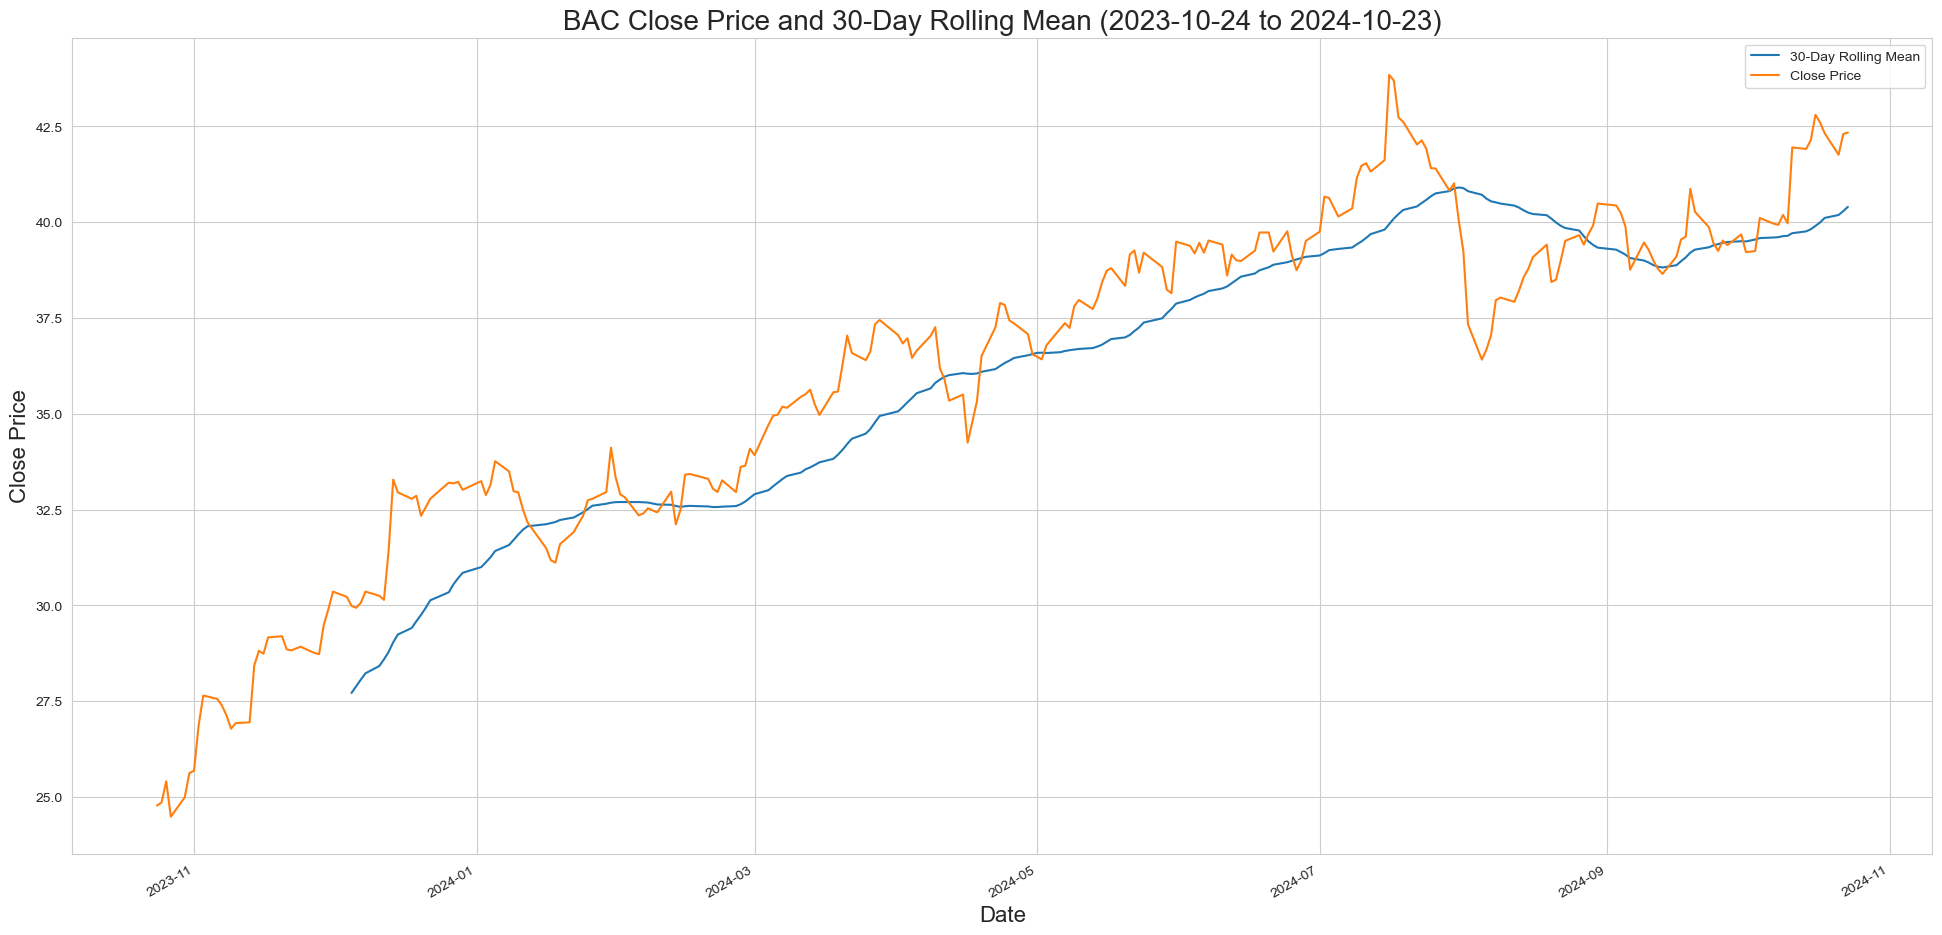

In [228]:
# Ensure the 'Date' index is in datetime format
BAC.index = pd.to_datetime(BAC.index)

# Plotting the data
plt.figure(figsize=(24,12))

# Plot 30-day rolling mean
BAC['Close'].loc['2023-10-24':'2024-10-23'].rolling(window=30).mean().plot(label='30-Day Rolling Mean')

# Plot the actual 'Close' price
BAC['Close'].loc['2023-10-24':'2024-10-23'].plot(label='Close Price')

# Adding labels and title
plt.title('BAC Close Price and 30-Day Rolling Mean (2023-10-24 to 2024-10-23)', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price', fontsize=16)

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [231]:
BAC.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

c:\Users\HP-PC\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



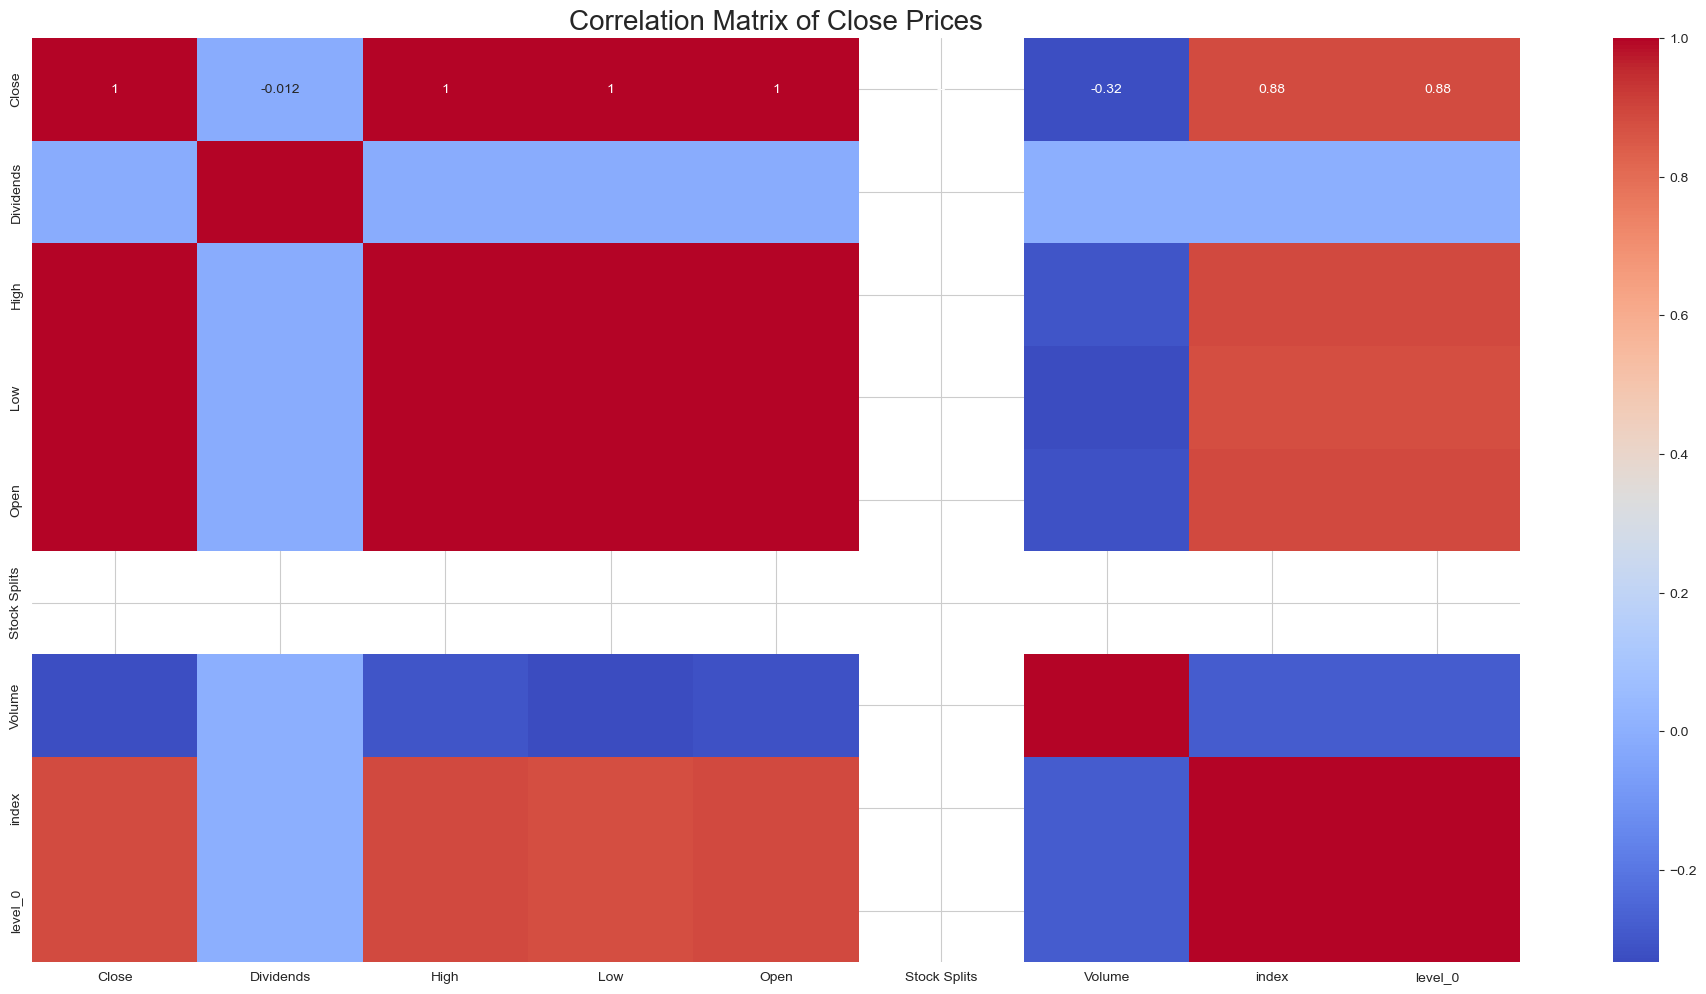

In [232]:
# Pivot the DataFrame with 'Date' is the index
close_prices = bank_stocks.pivot_table(index='Date')

# Compute the correlation matrix for the 'Close' prices across different companies
correlation_matrix = close_prices.corr()

# Plot the heatmap
plt.figure(figsize=(24, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add title and labels
plt.title('Correlation Matrix of Close Prices', fontsize=20)
plt.show()


<Figure size 2400x1200 with 0 Axes>

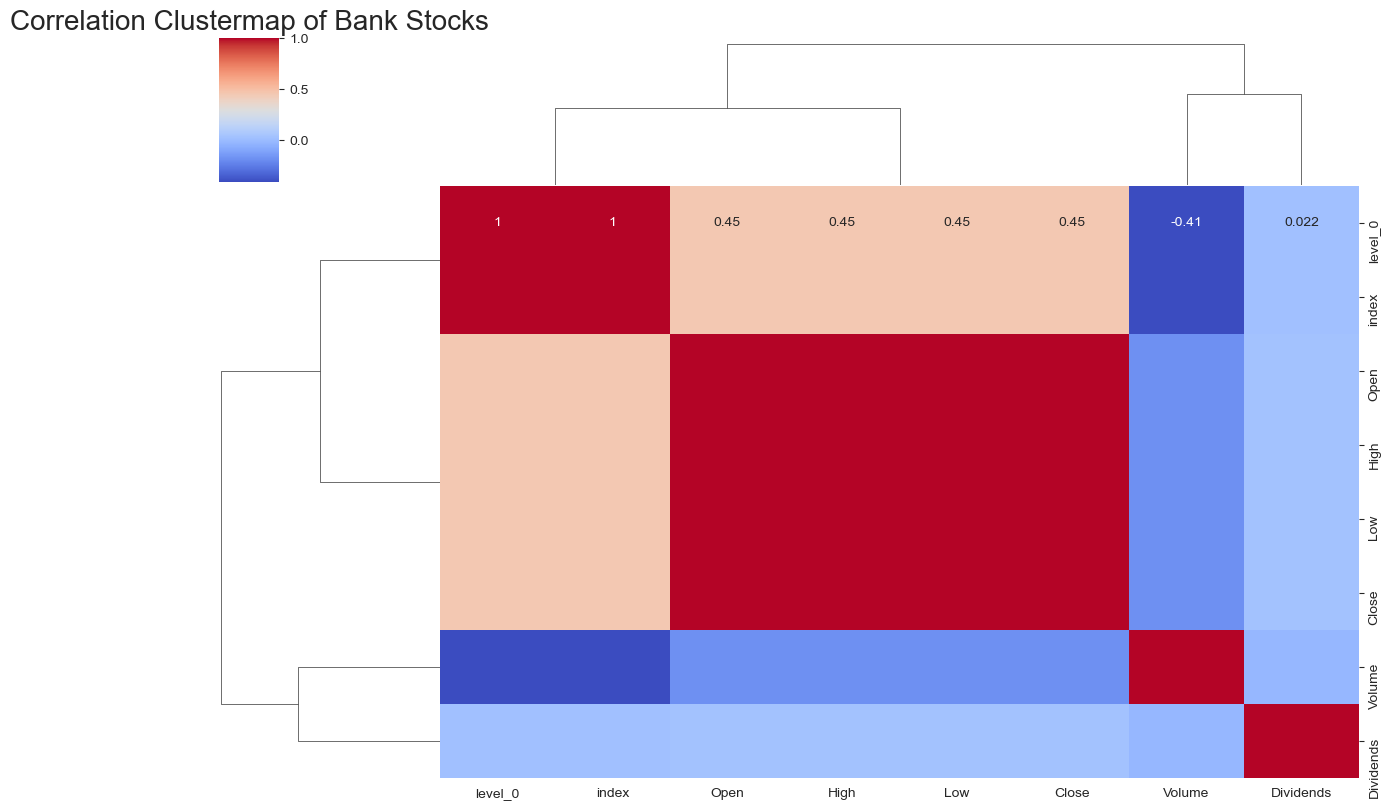

In [234]:

# Ensure 'bank_stocks' contains only numeric data (if needed)
numeric_columns = bank_stocks.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Check for NaN or infinite values and handle them
correlation_matrix = correlation_matrix.replace([np.inf, -np.inf], np.nan).dropna(how="all", axis=1).dropna(how="all", axis=0)


# Create the clustermap
plt.figure(figsize=(24, 12))
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', figsize=(12, 8))

# Add a title
plt.title('Correlation Clustermap of Bank Stocks', fontsize=20)

# Display the plot
plt.show()

In [236]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2023-10-24':'2024-10-23'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [238]:
MS['Close'].loc['2023-10-24':'2024-10-23'].ta_plot(study='sma')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [239]:
BAC['Close'].loc['2023-10-24':'2024-10-23'].ta_plot(study='boll')